<a href="https://colab.research.google.com/github/23a81a43a7/employee-salary-prediction/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
import joblib

In [75]:
df = pd.read_excel("/content/drive/MyDrive/adult 3.xlsx")

In [58]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [77]:
print(df.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [78]:
df = df.dropna()

In [79]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].str.lower()

In [80]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [81]:
X = df.drop("income", axis=1)
y = df["income"]

In [82]:
is_classification = y.nunique() <= 10 and y.dtype in [np.int64, np.int32, np.int8]


In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [84]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [85]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [86]:
# Model evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Linear Regression Performance:
R² Score: 0.25861488207720007
RMSE: 0.36476346302255336

Random Forest Regressor Performance:
R² Score: 0.45408323000403883
RMSE: 0.31300596639344724


In [87]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

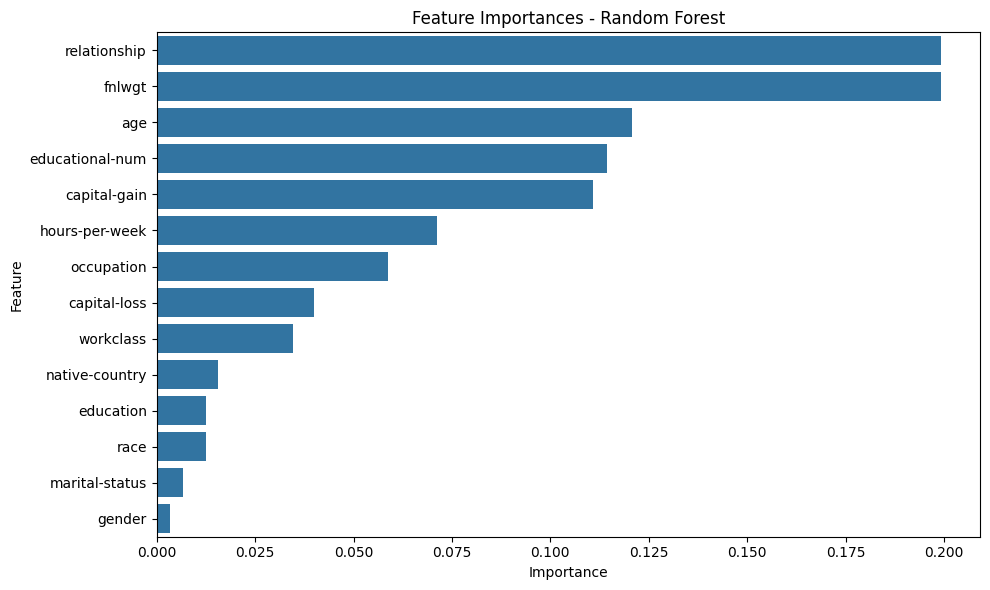

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

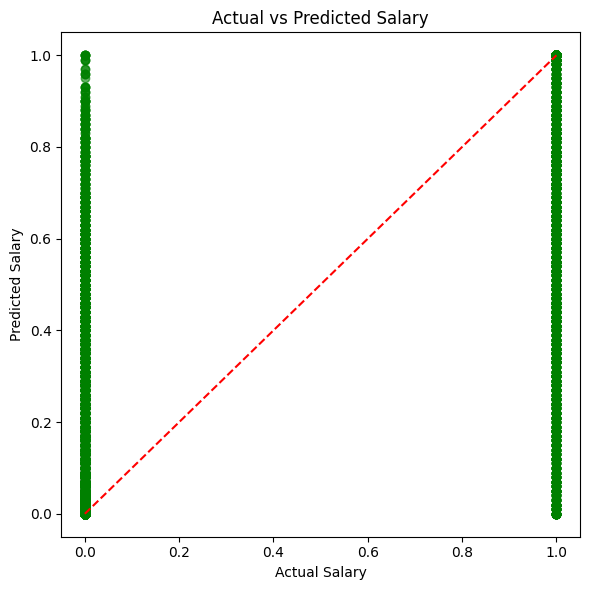

In [89]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

In [90]:
print("\nEnter the following details to predict salary:")

input_data = {}
for col in X.columns:
    if col in label_encoders:
        options = list(label_encoders[col].classes_)
        print(f"Options for {col}: {options}")
        while True:
            val = input(f"Enter {col}: ").lower()
            if val in options:
                val_encoded = label_encoders[col].transform([val])[0]
                input_data[col] = val_encoded
                break
            else:
                print("Invalid input. Please choose from the options.")
    else:
        val = float(input(f"Enter {col}: "))
        input_data[col] = val


input_df = pd.DataFrame([input_data])
input_scaled = scaler.transform(input_df)


if is_classification:
    pred = model.predict(input_scaled)[0]
    income_label = label_encoders["income"].inverse_transform([pred])[0]
    print(f"\n💰 Predicted Income Category: {income_label}")
else:
    pred_salary = max(0, model.predict(input_scaled)[0])
    print(f"\n💰 Predicted Salary: ₹{pred_salary:,.2f}")



Enter the following details to predict salary:
Enter age: 25
Options for workclass: ['?', 'federal-gov', 'local-gov', 'never-worked', 'private', 'self-emp-inc', 'self-emp-not-inc', 'state-gov', 'without-pay']
Enter workclass: private
Enter fnlwgt: 5
Options for education: ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'assoc-acdm', 'assoc-voc', 'bachelors', 'doctorate', 'hs-grad', 'masters', 'preschool', 'prof-school', 'some-college']
Enter education: masters
Enter educational-num: 7
Options for marital-status: ['divorced', 'married-af-spouse', 'married-civ-spouse', 'married-spouse-absent', 'never-married', 'separated', 'widowed']
Enter marital-status: married-af-spouse
Options for occupation: ['?', 'adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial', 'farming-fishing', 'handlers-cleaners', 'machine-op-inspct', 'other-service', 'priv-house-serv', 'prof-specialty', 'protective-serv', 'sales', 'tech-support', 'transport-moving']
Enter occupation: tech-sup